### Import Dependacies 

In [1]:
import pandas as pd
import numpy as np

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns


from geopy.distance import geodesic

import warnings
warnings.filterwarnings('ignore')

### Load Data

In [2]:
data=pd.read_csv('202406-baywheels-tripdata.csv')
data.shape

(303100, 13)

### EDA

In [3]:
data.head()
#displays the first few rows of the dataset

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,5219C69D4940A86C,classic_bike,2024-06-10 17:44:01.225,2024-06-10 17:48:29.667,14th Ave at Geary Blvd,SF-G10-2,23rd Ave at Clement St,SF-G7,37.780364,-122.472809,37.781929,-122.482786,member
1,6104B815856FDC57,classic_bike,2024-06-23 16:36:36.357,2024-06-23 16:57:29.618,In Chan Kaajal Park,SF-N23,Delancey St at Brannan St,SF-H30-2,37.763735,-122.415524,37.783844,-122.390002,member
2,BEC4F4017371E14A,electric_bike,2024-06-04 07:47:22.616,2024-06-04 08:15:45.955,14th Ave at Geary Blvd,SF-G10-2,Market St at Steuart St,SF-E29-2,37.780397,-122.472894,37.794525,-122.394880,member
3,55D40C06BF9BDB86,electric_bike,2024-06-11 15:52:00.248,2024-06-11 16:12:14.476,Francisco St at Columbus Ave,SF-A24-2,South Park St at 3rd St,SF-I29-2,37.804445,-122.415804,37.780760,-122.394989,member
4,78EAB3CE0BFD26E3,electric_bike,2024-06-13 15:55:40.301,2024-06-13 16:06:59.542,Terry Francois Blvd at Warriors Way,SF-M30-2,Union Square,SF-F26,37.769263,-122.386198,37.788300,-122.408531,member


In [4]:
data.info()
# displays the data type of each column and the number of non_null counts in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303100 entries, 0 to 303099
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             303100 non-null  object 
 1   rideable_type       303100 non-null  object 
 2   started_at          303100 non-null  object 
 3   ended_at            303100 non-null  object 
 4   start_station_name  287215 non-null  object 
 5   start_station_id    287215 non-null  object 
 6   end_station_name    283292 non-null  object 
 7   end_station_id      283181 non-null  object 
 8   start_lat           303100 non-null  float64
 9   start_lng           303100 non-null  float64
 10  end_lat             303021 non-null  float64
 11  end_lng             303021 non-null  float64
 12  member_casual       303100 non-null  object 
dtypes: float64(4), object(9)
memory usage: 30.1+ MB


##### Duplicates

In [5]:
# check for duplicates
data[data.duplicated(keep=False)].sort_values(by='ride_id')
# no duplicates on this dataset

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual


##### Missing Values

In [6]:
data.isnull().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    15885
start_station_id      15885
end_station_name      19808
end_station_id        19919
start_lat                 0
start_lng                 0
end_lat                  79
end_lng                  79
member_casual             0
dtype: int64

In [7]:
data[data.start_station_name.isna() & data.start_station_id.notna()]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual


In [8]:
data[data.start_station_name.notna() & data.start_station_id.isna()]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual


In [9]:
data[data.end_station_name.isna() & data.end_station_id.notna()]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual


In [10]:
data[data.end_station_name.notna() & data.end_station_id.isna()]
# we can illustrate filling nans by mapping using this case
# fill the missing end_station_ids with respect with their present end_station_name

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
826,3031B91E65D68A45,electric_bike,2024-06-17 20:05:27.155,2024-06-17 20:10:00.509,Dolores St at 15th St,SF-M21,Octavia Blvd at Page St,NaN,37.766155,-122.426685,37.77,-122.42,casual
5209,8EEF02D5C3AEE72C,electric_bike,2024-06-09 10:54:48.887,2024-06-09 11:00:44.441,20th St at Dolores St,SF-P21,29th St at Tiffany Ave,NaN,37.758278,-122.426086,37.74,-122.42,casual
9695,6DA1B536BD93C29B,electric_bike,2024-06-18 16:41:28.383,2024-06-18 16:52:16.514,Harrison St at 20th St,SF-P24,Octavia Blvd at Page St,NaN,37.758799,-122.412599,37.77,-122.42,casual
13053,733EED09E9E70363,electric_bike,2024-06-27 15:07:56.245,2024-06-27 15:21:13.327,Mississippi St at 17th St,SF-N29,San Francisco Ferry Building,NaN,37.764964,-122.394801,37.80,-122.39,casual
13054,E3ADA56227748525,electric_bike,2024-06-27 06:24:33.640,2024-06-27 06:28:18.691,McAllister St at Arguello Blvd,SF-J13,Anza St at Collins St,NaN,37.775356,-122.458102,37.78,-122.45,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
288475,D40B59E0D0DCF54F,electric_bike,2024-06-16 18:29:54.955,2024-06-16 18:42:41.475,The Embarcadero at Sansome St,SF-A27,San Francisco Caltrain East,NaN,37.804769,-122.403200,37.78,-122.39,casual
289611,172C395572393982,electric_bike,2024-06-17 21:30:17.148,2024-06-17 21:40:09.834,Grove St at Divisadero,SF-J18,7th Ave at Irving St,NaN,37.775966,-122.437744,37.76,-122.46,member
294845,3CD2BCBEEBB23BE6,electric_bike,2024-06-17 11:07:29.698,2024-06-17 11:12:13.192,NaN,NaN,22nd St Caltrain Station,NaN,37.770000,-122.390000,37.76,-122.39,member
295789,60650D7013D3A4F5,electric_bike,2024-06-16 04:33:53.575,2024-06-16 04:50:11.910,Valencia St at 24th St,SF-Q22-2,Leavenworth St at Broadway,NaN,37.752433,-122.420582,37.80,-122.42,member


In [11]:
mapping_data=data[['end_station_name','end_station_id']].drop_duplicates()
mapping_data.dropna(inplace=True)
mapping_data.isnull().sum()

end_station_name    0
end_station_id      0
dtype: int64

In [12]:
#zip the data and create a dictionary
mappings=dict(zip(mapping_data.end_station_name,mapping_data.end_station_id))
mappings

{'23rd Ave at Clement St': 'SF-G7',
 'Delancey St at Brannan St': 'SF-H30-2',
 'Market St at Steuart St': 'SF-E29-2',
 'South Park St at 3rd St': 'SF-I29-2',
 'Union Square': 'SF-F26',
 'Fillmore St at Jefferson St': 'SF-A19',
 '25th Ave at Irving St': 'SF-M7',
 'Post St at Baker St': 'SF-G17',
 'Powell St at Columbus Ave': 'SF-C25',
 'San Francisco Caltrain West': 'SF-J29',
 'Hospital St at Mariposa St': 'SF-N30',
 'Scott St at Golden Gate Ave': 'SF-I19',
 'Berry St at King St': 'SF-L28',
 'Eureka Valley Recreation Center': 'SF-O18',
 'Cyril Magnin St at Ellis St': 'SF-G26',
 '21st St at 5th Ave': 'OK-K10',
 'Otis St at Brady St': 'SF-K23',
 'McCoppin St at Valencia St': 'SF-K22-2',
 'Larkin St at California St': 'SF-F23-3',
 'San Pedro St at Hedding St': 'SJ-H9',
 'Julian St at 6th St': 'SJ-K11',
 'Buchanan St at North Point St': 'SF-A20',
 'Lyon St at Fell St': 'SF-K17',
 'Jackson Playground': 'SF-N28',
 'Leavenworth St at Broadway': 'SF-D24',
 'Davis St at Jackson St': 'SF-D28',
 '

In [13]:
# map the missing end_station_ids using the end_station_names
data['end_station_id']=data['end_station_name'].map(mappings)

In [14]:
data[data.end_station_name.notna() & data.end_station_id.isna()]
#we clearly see the mapping worked
#we may not require the end_station_ids in this case but the mapping technique can be handy in many situations

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual


In [15]:
#we consider dropping the remaining nans
data.dropna(inplace=True)

In [16]:
data[data.end_station_name =='Raymond Kimbell Playground']
# filtering [first creat a mask (Booleans) then apply your data]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
14909,EB47AC01455F85B5,classic_bike,2024-06-21 13:04:56.481,2024-06-21 13:06:21.641,Ellis St at Pierce St,SF-H19,Raymond Kimbell Playground,SF-G19,37.781982,-122.435770,37.783813,-122.434559,member
14911,F48FC2EC11579D00,classic_bike,2024-06-10 14:12:28.318,2024-06-10 14:13:58.721,Ellis St at Pierce St,SF-H19,Raymond Kimbell Playground,SF-G19,37.781982,-122.435770,37.783813,-122.434559,member
14923,64B5AE864F237854,electric_bike,2024-06-23 19:11:27.266,2024-06-23 19:29:29.208,Montgomery St BART,SF-F28-2,Raymond Kimbell Playground,SF-G19,37.789603,-122.400527,37.783813,-122.434559,casual
14944,AF9A5AD0859251BD,electric_bike,2024-06-18 20:46:07.300,2024-06-18 20:57:18.830,Montgomery St BART,SF-F28-2,Raymond Kimbell Playground,SF-G19,37.790044,-122.401325,37.783813,-122.434559,member
14945,3CAE078D83004BD5,electric_bike,2024-06-23 19:09:54.649,2024-06-23 19:29:36.295,Montgomery St BART,SF-F28-2,Raymond Kimbell Playground,SF-G19,37.789621,-122.400643,37.783813,-122.434559,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161644,C5A7D5662534CDF7,electric_bike,2024-06-29 11:16:41.268,2024-06-29 11:20:29.194,Divisadero St at Clay St,SF-E18,Raymond Kimbell Playground,SF-G19,37.789511,-122.440789,37.783813,-122.434559,casual
161645,F85FAEA990A46326,electric_bike,2024-06-11 19:29:41.537,2024-06-11 19:34:52.575,Divisadero St at Clay St,SF-E18,Raymond Kimbell Playground,SF-G19,37.789555,-122.440779,37.783813,-122.434559,member
161646,F634F6C2BD43EFB2,classic_bike,2024-06-29 15:07:06.917,2024-06-29 15:12:42.090,Divisadero St at Clay St,SF-E18,Raymond Kimbell Playground,SF-G19,37.789588,-122.440683,37.783813,-122.434559,member
161653,F47B595F36F2D3E2,electric_bike,2024-06-05 11:00:45.706,2024-06-05 11:21:35.799,Valencia St at 24th St,SF-Q22-2,Raymond Kimbell Playground,SF-G19,37.752597,-122.420626,37.783813,-122.434559,casual


In [17]:
data.sample(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
118986,7CB65A01C0FEF2DA,electric_bike,2024-06-08 11:46:47.939,2024-06-08 11:52:58.671,Grove St at Divisadero,SF-J18,Fell St at Clayton St,SF-K15-2,37.775990,-122.437767,37.772561,-122.448907,member
18469,4BF1545472B2A74B,electric_bike,2024-06-22 11:15:19.848,2024-06-22 11:19:04.823,Buchanan St at North Point St,SF-A20,Chestnut St at Van Ness Ave,SF-B22,37.804511,-122.433523,37.802300,-122.424413,member
50002,537CDFC1B4ACB2EF,electric_bike,2024-06-13 22:07:36.617,2024-06-13 22:16:48.894,16th St Mission BART North,SF-N22-1B,16th St at Prosper St,SF-N20-1,37.764898,-122.420075,37.764285,-122.431804,member
112335,AB52E13A21DA78F7,classic_bike,2024-06-08 14:23:22.482,2024-06-08 14:26:17.110,Duboce Park,SF-L19,Page St at Scott St,SF-K19,37.769223,-122.434062,37.772354,-122.435857,member
196871,C181130D1B733963,electric_bike,2024-06-01 18:04:52.885,2024-06-01 18:08:08.657,Broadway at Kearny St,SF-C26-1,Pier 1/2 at The Embarcadero,SF-D29,37.798053,-122.405880,37.796389,-122.394586,member
78506,4A25AD003AC3FA39,classic_bike,2024-06-25 07:55:28.184,2024-06-25 07:58:00.006,19th St at Florida St,SF-O25-1,Franklin Square,SF-N25,37.760447,-122.410807,37.764544,-122.410349,member
247959,FFEF86A65FE082DC,electric_bike,2024-06-22 11:47:31.422,2024-06-22 11:54:05.496,Davis St at Jackson St,SF-D28,Delancey St at Brannan St,SF-H30-2,37.797319,-122.398496,37.783844,-122.390002,member
282716,A5DA0BE1452B02B4,electric_bike,2024-06-12 18:16:32.397,2024-06-12 18:23:17.548,The Embarcadero at Sansome St,SF-A27,North Point St at Polk St,SF-A22,37.804783,-122.403249,37.805442,-122.423130,member
299207,F6406E0DE4E50406,electric_bike,2024-06-29 18:41:29.336,2024-06-29 18:51:58.706,19th Street BART,OK-K5-2,Horton St at 40th St,EM-D2,37.809562,-122.267698,37.829705,-122.287610,member
18661,B807C003DBF17CC0,electric_bike,2024-06-23 17:39:19.307,2024-06-23 18:07:19.787,Mission Dolores Park,SF-O21,26th Ave at Clement St,SF-G6-1,37.761365,-122.426446,37.781758,-122.486029,member


<Axes: ylabel='routes'>

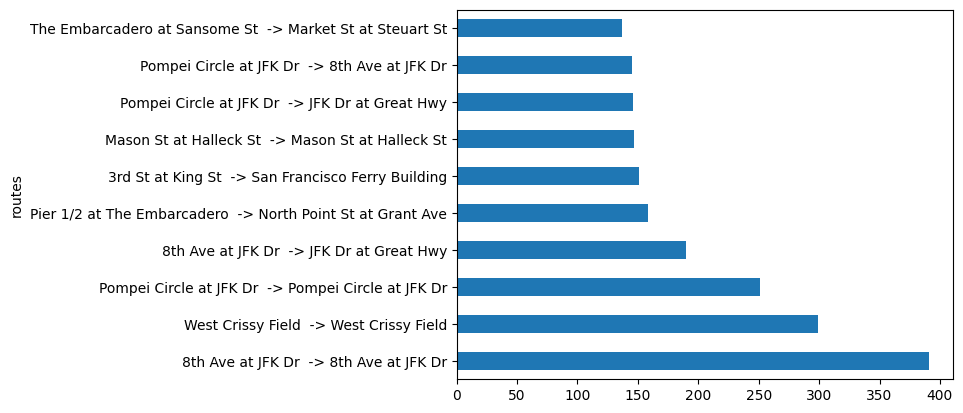

In [18]:
# Lets create a routes column and check which is the commonly used one

data['routes'] = data.start_station_name + '  -> ' + data.end_station_name
data.routes.value_counts()[:10].plot(kind='barh')

It is clear that **8th Ave at JFK Dr -> 8th Ave at JFK Dr** is the commonly used route<br>
<br>
We can chose to allocate more resources at this routes (bikes and employees )

<Axes: ylabel='start_station_name'>

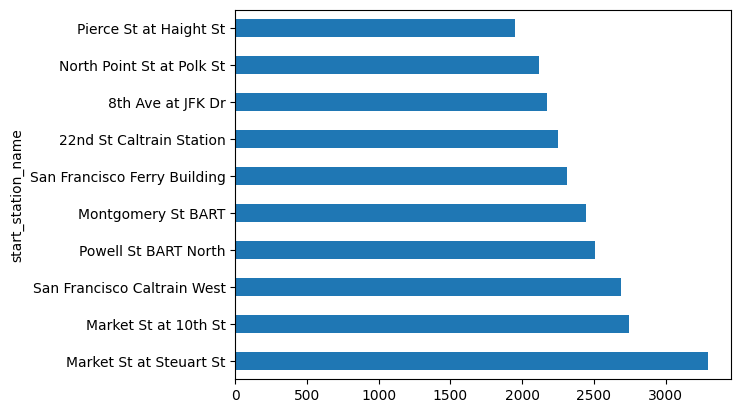

In [19]:
# These are the most common start stations
data.start_station_name.value_counts()[:10].plot(kind='barh')

<Axes: ylabel='end_station_name'>

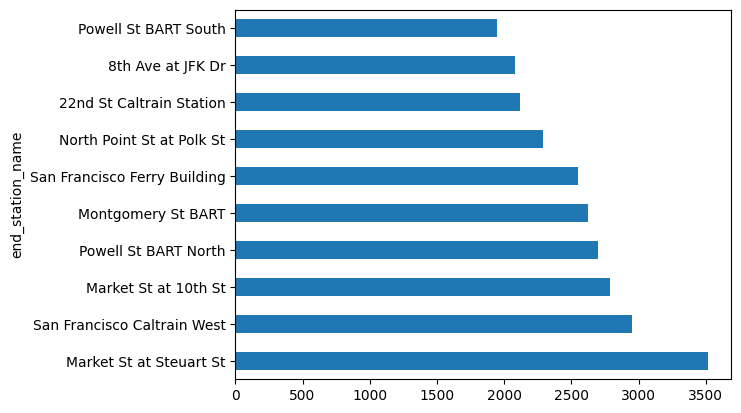

In [20]:
# These are the most common end stations
data.end_station_name.value_counts()[:10].plot(kind='barh')

We notice the most common start station is also the most common end station<br>


In [21]:
data[data['routes'] == 'Market St at Steuart St  -> Market St at Steuart St'].head(2)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,routes
245799,1BC3CCF476F3581F,electric_bike,2024-06-01 20:44:17.533,2024-06-01 20:44:30.595,Market St at Steuart St,SF-E29-2,Market St at Steuart St,SF-E29-2,37.794500,-122.394797,37.794525,-122.39488,member,Market St at Steuart St -> Market St at Steua...
245802,EB2B8349688EE701,electric_bike,2024-06-12 16:59:52.160,2024-06-12 17:00:08.121,Market St at Steuart St,SF-E29-2,Market St at Steuart St,SF-E29-2,37.794506,-122.394848,37.794525,-122.39488,member,Market St at Steuart St -> Market St at Steua...


In [22]:
most_common_route_distance=geodesic((37.794500,-122.394797),(37.794525,-122.39488)).m
most_common_route_distance

7.819295747266919

This common route is approximately **8 meters long** .
Hence allocating more bikes would be reasonable 

##### Feature Engineering 

In [23]:
data.started_at=pd.to_datetime(data['started_at'])
data.ended_at=pd.to_datetime(data['ended_at'])

In [24]:
data['Total_time_in_hours']=(data['ended_at'] - data['started_at']).dt.total_seconds()/3600
data['Total_time_in_hours']=data['Total_time_in_hours'].round(2)

In [25]:
def calculate_distance(start_lat,start_lon,end_lat,end_lon):

    return geodesic((start_lat,start_lon),(end_lat,end_lon)).km

data['Distance_km']=data.apply(lambda row: calculate_distance(row['start_lat'],row['start_lng'],row['end_lat'],row['end_lng']),axis=1)

#### Univariate Analysis

In [26]:
member_type_df=data.member_casual.value_counts(normalize=True).reset_index()
member_type_df

,member_casual,proportion
0,member,0.727305
1,casual,0.272695


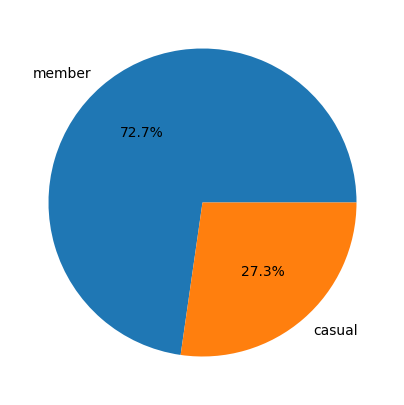

In [27]:
plt.figure(figsize=(5,5))
plt.pie(member_type_df.proportion.values,labels=member_type_df.member_casual.values,autopct='%1.1f%%')
plt.show()

There are more **members** compared to **casuals** in the data set

In [28]:
bike_type=data.rideable_type.value_counts(normalize=True).reset_index()
bike_type

,rideable_type,proportion
0,electric_bike,0.764379
1,classic_bike,0.235621


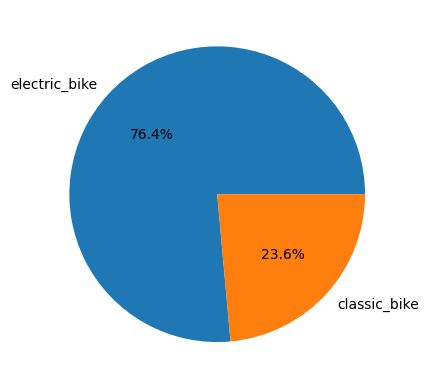

In [29]:
plt.pie(bike_type.proportion.values,labels=bike_type.rideable_type.values,autopct='%1.1f%%')
plt.show()

More people prefer **electric bikes** compared to **classic** ones

<Axes: xlabel='member_casual', ylabel='Total_time_in_hours'>

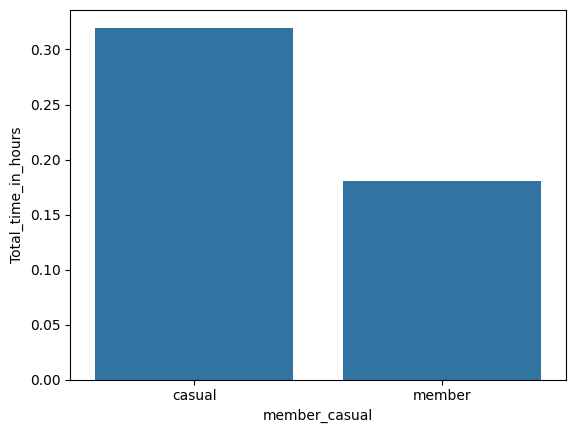

In [30]:
time_duration_by_member_casual=data.groupby('member_casual')['Total_time_in_hours'].mean()
sns.barplot(time_duration_by_member_casual)

On average **casual** take more hours trips compared to **members** 

<Axes: xlabel='member_casual', ylabel='Distance_km'>

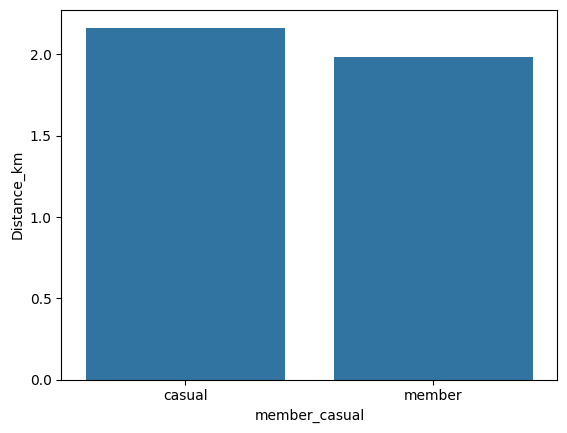

In [31]:
distance_by_member_casual_comparison=data.groupby('member_casual')['Distance_km'].mean()
sns.barplot(distance_by_member_casual_comparison)

On average **casual** ride longer distances compared to **members**

<Axes: xlabel='rideable_type', ylabel='Total_time_in_hours'>

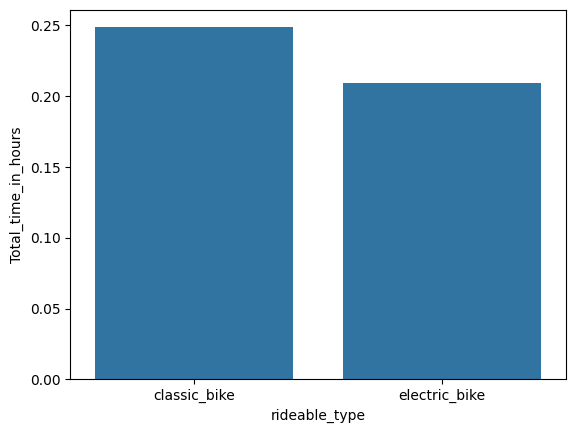

In [32]:
time_duration_by_rideable_type=data.groupby('rideable_type')['Total_time_in_hours'].mean()
sns.barplot(time_duration_by_rideable_type)

**Classic bikes** take longer compared **electric bikes** on average <br> Much reasonable since **electric bikes** are faster

<Axes: xlabel='rideable_type', ylabel='Distance_km'>

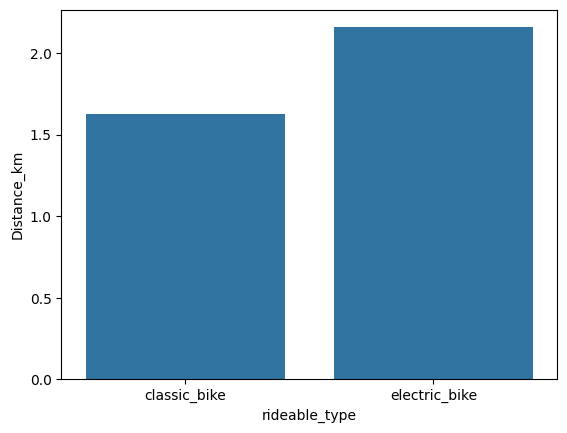

In [33]:
distance_by_rideable_type_comparison=data.groupby('rideable_type')['Distance_km'].mean()
sns.barplot(distance_by_rideable_type_comparison)

On average **electric bikes** cover longer distance trips

In [34]:
data['Start_hour']=data['started_at'].dt.hour

<Axes: xlabel='Start_hour', ylabel='Number_of_trips'>

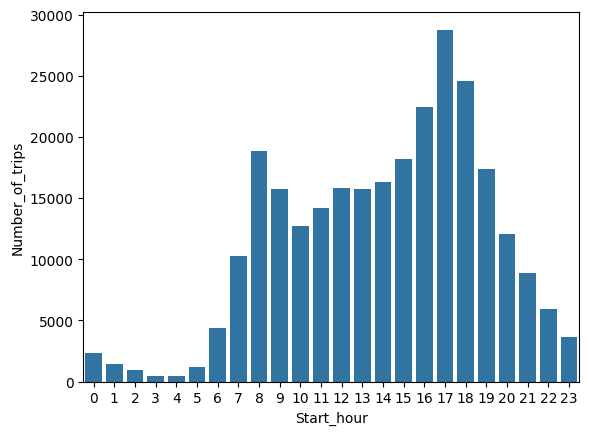

In [35]:
common_bike_hour=data.groupby('Start_hour').ride_id.count().reset_index().rename(columns={'ride_id':'Number_of_trips'})
sns.barplot(data=common_bike_hour,x='Start_hour',y='Number_of_trips')

most of the riders like taking trips at 1700 hours

#### Bivariate analysis

<Axes: xlabel='Start_hour', ylabel='trip_count_per_member_type'>

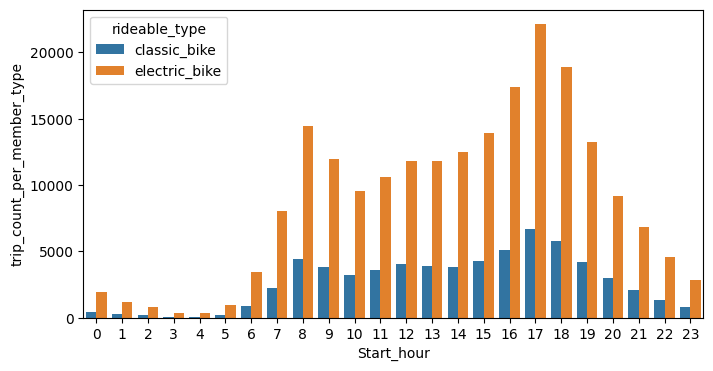

In [36]:
trip_count_per_member_type=data.groupby(['Start_hour','rideable_type']).ride_id.count().reset_index().rename(columns={'ride_id':'trip_count_per_member_type'})
plt.figure(figsize=(8,4))
sns.barplot(trip_count_per_member_type,x='Start_hour',y='trip_count_per_member_type',hue='rideable_type',errorbar=None)

Clearly <b>electric bikes</b> are more preferred compared to **classic** ones

In [37]:
trip_counts_per_route=data.groupby('routes').ride_id.count().reset_index().rename(columns={'ride_id':'total_trip_count'})

In [38]:
trip_count_member_casual=data.groupby(['routes','member_casual']).ride_id.count().reset_index().rename(columns={'ride_id':'trip_count_per_member_type'})

In [39]:
casuals_counts=trip_count_member_casual[trip_count_member_casual.member_casual == 'casual']

In [40]:
casuals_counts.rename(columns={'trip_count_per_member_type':'casuals_trip_count'},inplace=True)

In [41]:
Member_profile=pd.merge(casuals_counts,trip_counts_per_route,on='routes',how='inner')
Member_profile.head()

,routes,member_casual,casuals_trip_count,total_trip_count
0,Sloat Blvd at The Great Highway to 46th Ave ...,casual,1,1
1,Sloat Blvd at The Great Highway to 46th Ave ...,casual,3,5
2,Sloat Blvd at The Great Highway to 46th Ave ...,casual,1,1
3,Sloat Blvd at The Great Highway to 46th Ave ...,casual,2,2
4,Sloat Blvd at The Great Highway to 46th Ave ...,casual,1,2


In [43]:
Member_profile['Casuals_proportion']=Member_profile['casuals_trip_count']/Member_profile['total_trip_count']
Member_profile.head()

,routes,member_casual,casuals_trip_count,total_trip_count,Casuals_proportion
0,Sloat Blvd at The Great Highway to 46th Ave ...,casual,1,1,1.0
1,Sloat Blvd at The Great Highway to 46th Ave ...,casual,3,5,0.6
2,Sloat Blvd at The Great Highway to 46th Ave ...,casual,1,1,1.0
3,Sloat Blvd at The Great Highway to 46th Ave ...,casual,2,2,1.0
4,Sloat Blvd at The Great Highway to 46th Ave ...,casual,1,2,0.5


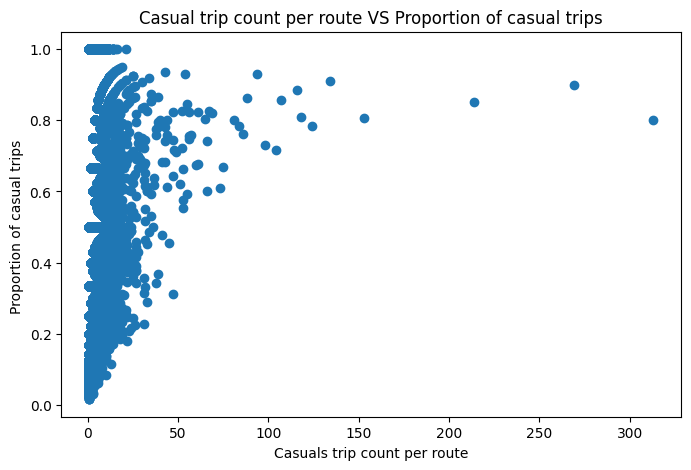

In [45]:
plt.figure(figsize=(8,5))
plt.scatter(Member_profile.casuals_trip_count,Member_profile.Casuals_proportion)
plt.xlabel('Casuals trip count per route')
plt.ylabel('Proportion of casual trips ')
plt.title('Casual trip count per route VS Proportion of casual trips')
plt.show()

The routes that have highest proportion of casual members tend to have many trips <br>
This can be our focus areas to convert these casual to members

In [48]:
Member_profile[(Member_profile.casuals_trip_count>50)  & (Member_profile.Casuals_proportion>0.6) ].head(5)

,routes,member_casual,casuals_trip_count,total_trip_count,Casuals_proportion
3038,36th Ave at Spreckels Lake Dr -> 36th Ave at ...,casual,94,101,0.930693
3072,36th Ave at Spreckels Lake Dr -> JFK Dr at Gr...,casual,52,63,0.825397
4748,8th Ave at JFK Dr -> 8th Ave at JFK Dr,casual,313,391,0.800512
4794,8th Ave at JFK Dr -> JFK Dr at Great Hwy,casual,153,190,0.805263
4835,8th Ave at JFK Dr -> Pompei Circle at JFK Dr,casual,75,112,0.669643


These are the routes where we have a large proportion of **casuals** doing **more** trips<br>
If more of this casuals are converted to members it would be profitable for the bike business since members tend to take more trips

In [49]:
distance_per_route=data.groupby('routes').Distance_km.mean().reset_index().rename(columns={'Distance_km':'Average_distance_per_route'})
main_features=pd.merge(Member_profile,distance_per_route,on='routes',how='inner')

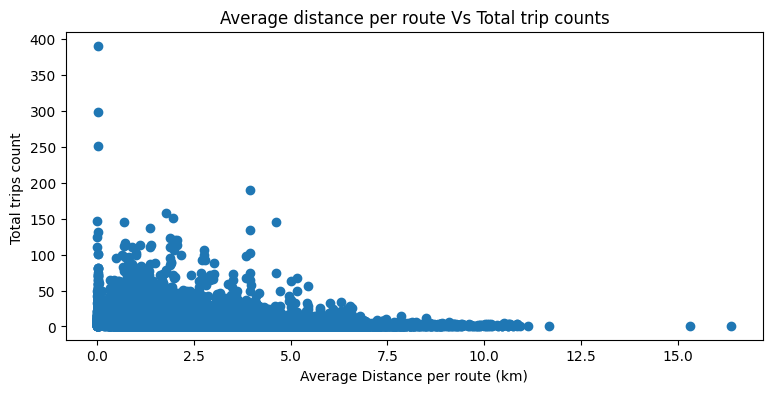

In [50]:
plt.figure(figsize=(9,4))
plt.scatter(main_features.Average_distance_per_route,main_features.total_trip_count)
plt.xlabel('Average Distance per route (km)')
plt.ylabel('Total trips count ')
plt.title('Average distance per route Vs Total trip counts')
plt.show()

**Longer trips** tend to have lower count compared to **shorter trips less (than 2 km)** which are more 

In [51]:
inter_trip_duration=data.groupby('routes').Total_time_in_hours.mean().reset_index().rename(columns={'Total_time_in_hours':'average_duration_per_route'})
main_features=pd.merge(main_features,inter_trip_duration,on='routes',how='inner')

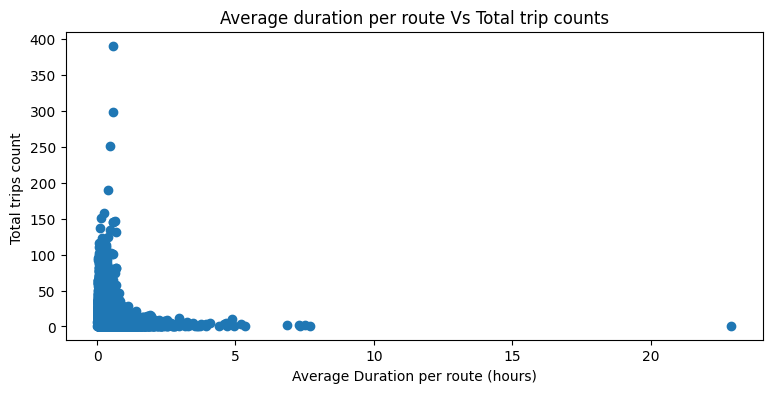

In [52]:
plt.figure(figsize=(9,4))
plt.scatter(main_features.average_duration_per_route,main_features.total_trip_count)
plt.xlabel('Average Duration per route (hours)')
plt.ylabel('Total trips count ')
plt.title('Average duration per route Vs Total trip counts')
plt.show()

Most frequent trips in the dataset on average take a few hours **(less than 5 hours)**

In [53]:
main_features

,routes,member_casual,casuals_trip_count,total_trip_count,Casuals_proportion,Average_distance_per_route,average_duration_per_route
0,Sloat Blvd at The Great Highway to 46th Ave ...,casual,1,1,1.000000,5.665351,0.460000
1,Sloat Blvd at The Great Highway to 46th Ave ...,casual,3,5,0.600000,5.424529,0.684000
2,Sloat Blvd at The Great Highway to 46th Ave ...,casual,1,1,1.000000,3.870817,0.740000
3,Sloat Blvd at The Great Highway to 46th Ave ...,casual,2,2,1.000000,3.925513,0.190000
4,Sloat Blvd at The Great Highway to 46th Ave ...,casual,1,2,0.500000,3.194783,0.220000
...,...,...,...,...,...,...,...
27505,Yerba Buena Center for the Arts -> Washington...,casual,2,6,0.333333,1.211219,0.151667
27506,Yerba Buena Center for the Arts -> Washington...,casual,1,1,1.000000,2.175118,0.190000
27507,Yerba Buena Center for the Arts -> Webster St...,casual,1,1,1.000000,2.866447,0.370000
27508,Yerba Buena Center for the Arts -> Webster St...,casual,1,1,1.000000,2.683723,0.300000


In [54]:
member_rideable_type=data.groupby(['Start_hour','member_casual','rideable_type']).ride_id.count().reset_index().rename(columns={'ride_id':'trip_count'})

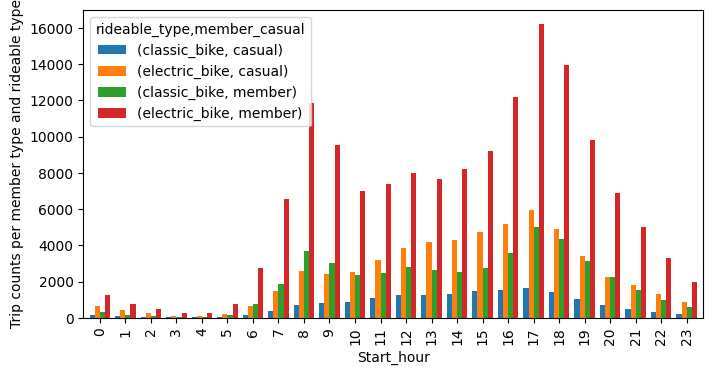

In [55]:
pivot_df=pd.pivot(member_rideable_type,index='Start_hour',columns=['rideable_type','member_casual'],values='trip_count')
pivot_df.plot(kind='bar',figsize=(8,4),width=0.8)
plt.ylabel('Trip counts per member type and rideable type')
plt.show()

**Electric bikes** are frequently preferred by both user categories compared to **classic bikes**

##### Correlation

<Axes: >

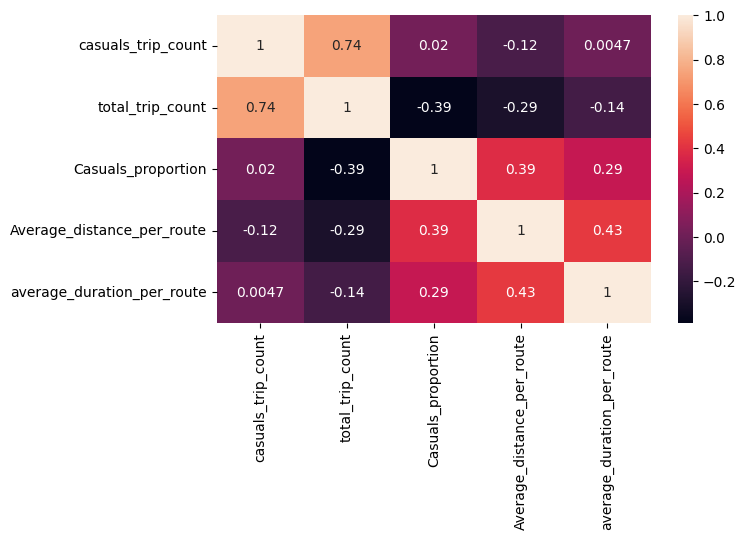

In [56]:
plt.figure(figsize=(7,4))
sns.heatmap(main_features.drop(['routes','member_casual'],axis=1).corr(),annot=True)

If the average ditance is large the trip duration will be more **(0.43 corr)** <br>
We saw that casual members on average cover longer distances so if the proportion of casual members is high distance covered is also large **(0.39 corr)**<br>
Therefore, average duartion time is more if casual proportion is high **(0.29 corr)** since more distance is being covered